<a href="https://colab.research.google.com/github/jpmortaza/analise_youtube/blob/main/Pandorga_tech_%3Eyoutube_legendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDORGA TECH - EXTRAÇÃO E ANALISE TEXTUAL DE VÍDEO DO YOUTUBE (LEGENDA DO YOUTUBE)
Esse script Sugiu da necessidade de realizar a analise semantica de diversos vídeos do youtube, precisavamos criar um relatório com as pautas mais abordadas por um candidato em seus vídeos, o interessante é que ele tinha mais de mil vídeos no youtube, o que seria impossível de ser realizado manualmente ou seja assistindo os vídeos.

Instruções de utilização.
1. Nos arquivos abra o arquivo de txt id_youtube
2. Insira nele os links dos vídeos que quer analisar. (vídeos que contenham legenda)
3. Execute o Buscar.
4. Os resultados serão salvos em um arquivo txt com o nome transcricao.
5. Faça donwload do arquivo e formate da forma que for mais útil.


Assista o vídeo abaixo:
[Vídeo Youtube](https://www.youtube.com/watch?v=42n878GWZeE)


# IMPORT/INSTALL

In [48]:
!pip install youtube-transcript-api
!pip install pytube
!pip install wordcloud -q

from pytube import extract
import pandas as pd
from youtube_transcript_api import YouTubeTranscriptApi
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('punkt')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# EXTRAI AS LEGENDAS

In [57]:
#EXTRAI AS LEGENDAS
with open("id_youtube.txt") as file:
    for link in file:
        id=extract.video_id(link)
        srt = YouTubeTranscriptApi.get_transcript(id,languages=['pt'])
#        with open("transcricao.txt", "a") as f:
#            for i in srt:
#                f.write("{}\n".format(i))

# DATAFRAME/DOWNLOAD

In [60]:
#CRIA O DATAFRAME
df = pd.DataFrame(srt)
n_df=df.assign(Video=id)
char = ["\n","!","?",".",","]
for symbol in char:
    df['text'] = df['text'].str.replace(symbol, " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [61]:
#DOWNLOAD EM CSV
df.to_csv("legendas.csv", encoding = 'utf-8')

In [59]:
#VER O DATAFRAME
n_df

,text,start,duration,Video
0,E aí,55.850,2.060,ofEgUYCK0Ks
1,o,61.620,2.000,ofEgUYCK0Ks
2,Olá muito boa tarde meu querido o povo,74.090,7.389,ofEgUYCK0Ks
3,do Rio Grande do Sul sextou não fala Rio,77.909,5.960,ofEgUYCK0Ks
4,Grande em Hoje é sexta feira,81.479,5.701,ofEgUYCK0Ks
...,...,...,...,...
2422,tá pela Rede Cultura de televisão aqui,6832.340,4.890,ofEgUYCK0Ks
2423,na Ulbra TV Beijo abraço tamo junto,6834.320,6.870,ofEgUYCK0Ks
2424,abraço tchau até segunda,6837.230,3.960,ofEgUYCK0Ks
2425,E aí,6841.560,2.090,ofEgUYCK0Ks


# ANALISE TEXTUAL

In [53]:
#CONTAGEM DE PALAVRAS
palavras = " ".join(s for s in df['text'])
print("Quantidade de Palavras: {}".format(len(palavras)))

Quantidade de Palavras: 88264


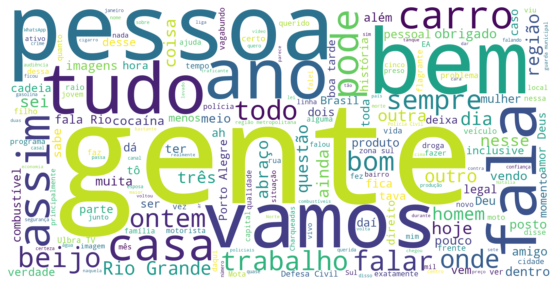

In [54]:
#NOVO MÓDULO PARA NÚVEM DE PALAVRAS
stopwords.extend(["né","aí","aqui","agora","vou",
                  "quer","vai","porque","lá","tá","olha","então"])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(palavras)
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()


plt.show()

In [62]:
print(palavras)

E aí o Olá muito boa tarde meu querido o povo do Rio Grande do Sul sextou não fala Rio Grande em Hoje é sexta feira 28 de janeiro dia do combate ao trabalho escravo E por incrível que pareça em pleno século 21 a muitos trabalhadores que são escravizadas Neste País principalmente na região centro-norte do país região centro-oeste região Nordeste também nos do Norte principalmente naquela região do norte de Mato Grosso do Sul do Pará infelizmente né isso ainda acontece mas cabe ao ministério do trabalho aos fiscais do ministério do trabalho coibir O trabalho e a escravidão e você se tem conhecimento de um fato semelhante que denuncio ok Vou para quem não me conhece eu sou aquele gordinho encrenqueira o caçador de confusão também conhecido como gordinho o sonho e Alexandre Mota e esse é o fala Rio Grande aqui pela Ulbra TV espera o contato não só com a sua audiência mas também com o seu carinho a sua confiança no meu trabalho e no trabalho da minha equipe jovem extremamente competente o n